In [16]:
import matplotlib.pyplot as plt

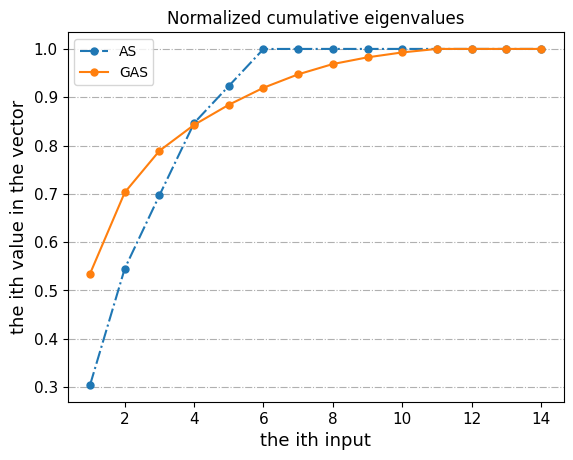

In [17]:
### Eigenvalues
deriv = np.loadtxt('ASv9.txt',delimiter=',')
u0, s0, vh0 = np.linalg.svd(deriv.astype(float)/100, full_matrices=True) 
s0 = s0**2

deriv = np.loadtxt('GASv9.txt',delimiter=',')
u, s, vh = np.linalg.svd(deriv.astype(float)/100, full_matrices=True) 
s = s**2

x=np.arange(1,1+len(s),1)
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=100)
colorc=plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.plot(x,np.cumsum(s0)/np.sum(s0), label='AS', c=colorc[0], linestyle='-.', marker='.', markersize='10')
ax.plot(x,np.cumsum(s)/np.sum(s), label='GAS', c=colorc[1], linestyle='-', marker='.', markersize='10')
ax.set_xlabel('the ith input', fontsize=13)
ax.set_ylabel('the ith value in the vector', fontsize=13)
ax.tick_params(axis='both', labelsize=11)
ax.yaxis.grid(True, linestyle='-.')

legend = ax.legend(loc='best')
plt.title('Normalized cumulative eigenvalues') 
plt.show()

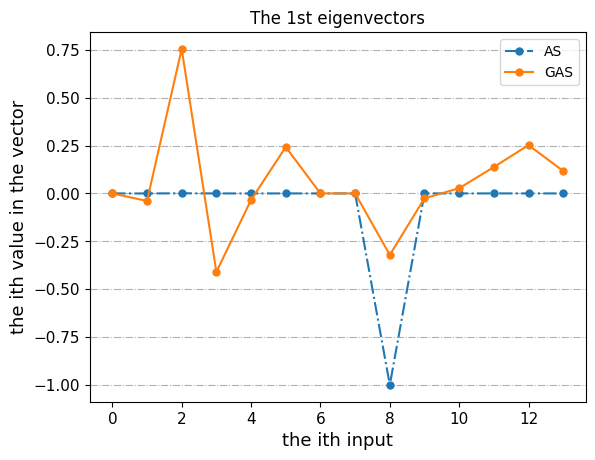

In [6]:
### Eigenvectors
x=np.arange(0,len(s),1)
fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=100)
colorc=plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.plot(x,u0[:,0], label='AS', c=colorc[0], linestyle='-.', marker='.', markersize='10')
ax.plot(x,u[:,0], label='GAS', c=colorc[1], linestyle='-', marker='.', markersize='10')
ax.set_xlabel('the ith input', fontsize=13)
ax.set_ylabel('the ith value in the vector', fontsize=13)
ax.tick_params(axis='both', labelsize=11)
ax.yaxis.grid(True, linestyle='-.')

legend = ax.legend(loc='best')
plt.title('The 1st eigenvectors') 
plt.show()

Normalized DGSM: 0.0 & 0.149641 & 0.240932 & 7.5e-05 & 0.076654 & 3.1e-05 & 0.0 & 0.0 & 0.304375 & 0.151654 & 0.0 & 0.076612 & 2.4e-05 & 1e-06


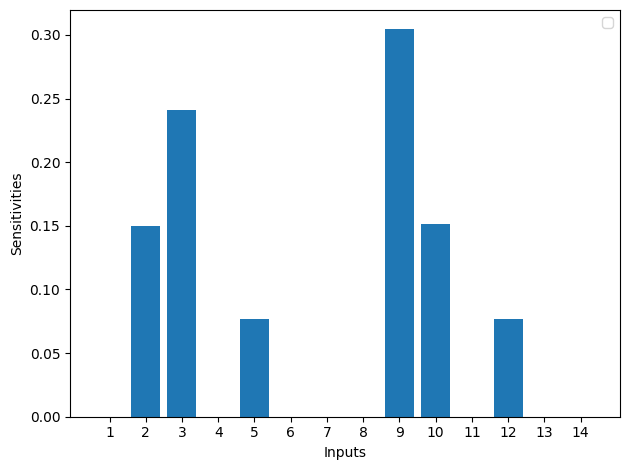

In [18]:
### DGSMs
ac_score1 = np.round(u0**2@s0/sum(u0**2@s0),6)
print('Normalized DGSM:',' & '.join(str(i) for i in ac_score1))

x = np.arange(1,15)
labels = x
width = 0.8
fig, ax = plt.subplots()
rects1 = ax.bar(x, ac_score1, width)
ax.set_ylabel('Sensitivities')
ax.set_xlabel('Inputs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

Normalized active scores: 0.0 & 0.162079 & 0.260959 & 0.0 & 0.078659 & 0.0 & 0.0 & 0.0 & 0.329674 & 0.16426 & 0.0 & 0.004368 & 0.0 & 0.0


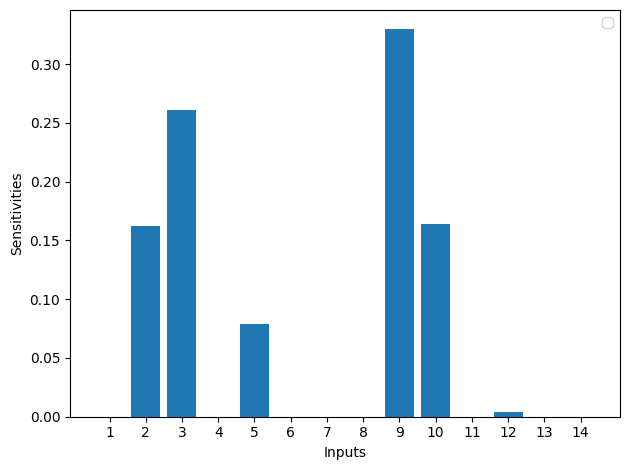

In [9]:
### Activity scores
d1 = 5
ac_score2 = np.round(u0[:,:d1]**2@s0[:d1]/sum(u0[:,:d1]**2@s0[:d1]),6)
print('Normalized active scores:',' & '.join(str(i) for i in ac_score2))
x = np.arange(1,15)
labels = x
width = 0.8

fig, ax = plt.subplots()
rects1 = ax.bar(x, ac_score2, width)
ax.set_ylabel('Sensitivities')
ax.set_xlabel('Inputs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

Normalized active scores: 0.0 & 0.046383 & 0.407606 & 0.152705 & 0.000878 & 0.04686 & 0.0 & 0.0 & 0.171324 & 0.038899 & 0.000551 & 0.01438 & 0.05092 & 0.069493


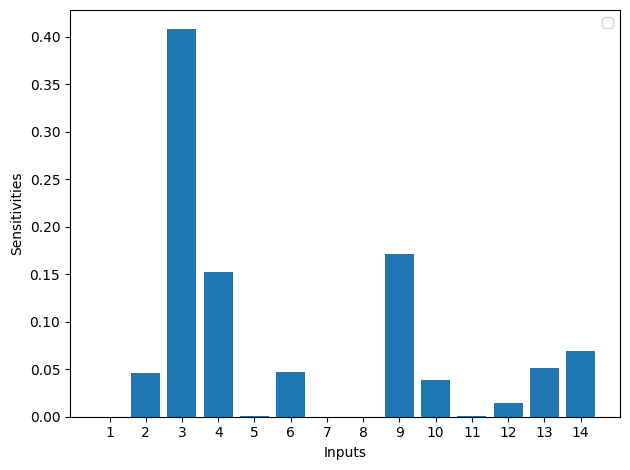

In [10]:
### Global activity scores
d1 = 6
ac_score2 = np.round(u[:,:d1]**2@s[:d1]/sum(u[:,:d1]**2@s[:d1]),6)
print('Normalized active scores:',' & '.join(str(i) for i in ac_score2))
x = np.arange(1,15)
labels = x
width = 0.8

fig, ax = plt.subplots()
rects1 = ax.bar(x, ac_score2, width)
ax.set_ylabel('Sensitivities')
ax.set_xlabel('Inputs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

Upper sobol: 0.0 & 0.0590528001851335 & 0.540701446382631 & 0.216597937918384 & 0.0181571067026279 & 0.0899341384929991 & 0.0 & 0.0 & 0.204072566273062 & 0.045299944055535 & 0.0122592703630164 & 0.0311260076426105 & 0.0984760504540458 & 0.0820129675852538
Lower sobol: 0.0 & 0.00134496561246276 & 0.414620905331435 & 0.173367928048592 & 0.00119940317536386 & 0.0660647502730427 & 0.0 & 0.0 & 0.0968550053789913 & 0.00188067337613089 & 0.000459120171148447 & 0.0188577148937026 & 0.0694174093866001 & 0.0150036960641854


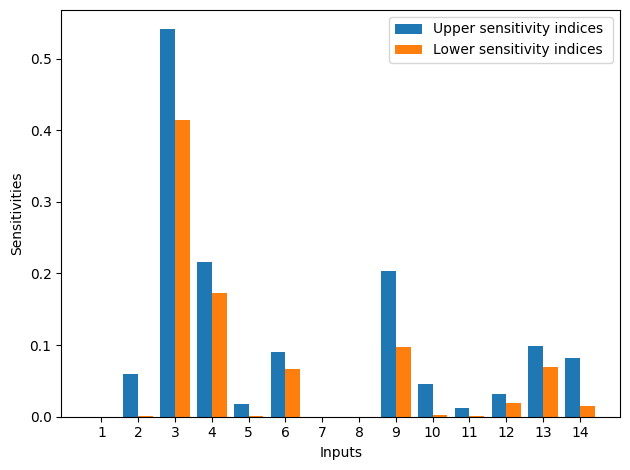

In [15]:
### Sobol' indices
sobol = np.loadtxt('power_sobol.txt',delimiter=',')
print('Upper sobol:',' & '.join(str(sobol[i][0]) for i in range(14)))
print('Lower sobol:',' & '.join(str(sobol[i][1]) for i in range(14)))

x = np.arange(1,15)
labels = x
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, sobol[:,0], width, label='Upper sensitivity indices')
rects2 = ax.bar(x+width/2, sobol[:,1], width, label='Lower sensitivity indices ')
ax.set_ylabel('Sensitivities')
ax.set_xlabel('Inputs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.savefig('figure15.png')

/var/folders/3g/94n8wq0x2173q3pr5zt6vy940000gq/T/ipykernel_126/1980570915.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('tab20', 14)


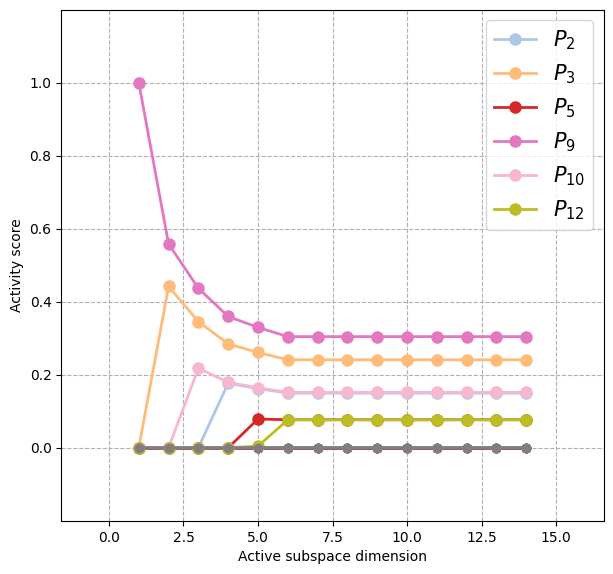

In [20]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('tab20', 14)
colors = cmap(np.linspace(0, 1, 14))

ac_score1 = []
Nlist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
dim = 14
in_labels = Nlist
text = [str(i) for i in Nlist]

for d1 in Nlist:
    ac_score1.append(u0[:,:d1]**2@s0[:d1]/sum(u0[:,:d1]**2@s0[:d1]))
ac_score1 = np.array(ac_score1)

plt.figure(figsize=(7,7))
plt.rc('font')
for i in range(dim):
    if ac_score1[-1,i]>0.05: 
        plt.plot(np.array(Nlist), ac_score1[:,i], 'o-', markersize=8,linewidth=2,clip_on=False,color = colors[i],label = r'$P_{'+str(in_labels[i])+'}$')
    else:       
        plt.plot(np.array(Nlist), ac_score1[:,i], 'o-', markersize=6,linewidth=2,clip_on=False)



plt.xlabel('Active subspace dimension')
plt.ylabel('Activity scores')
plt.grid(True,linestyle = '--')
plt.legend(prop={'size': 15})
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

/var/folders/3g/94n8wq0x2173q3pr5zt6vy940000gq/T/ipykernel_126/3538634334.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('tab20', 14)


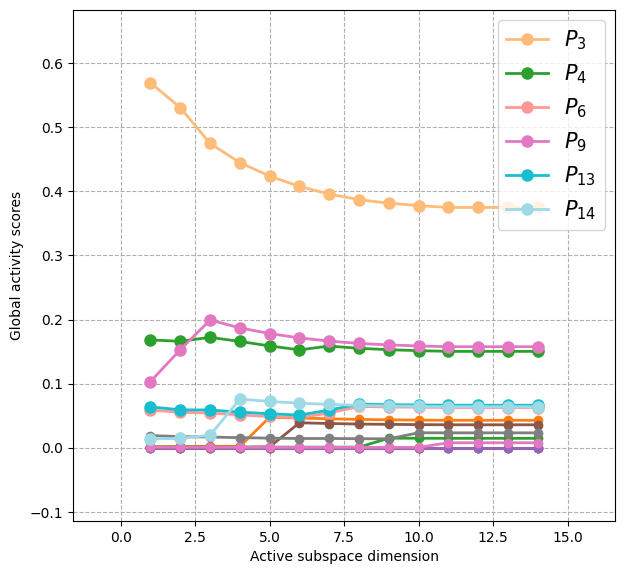

In [21]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('tab20', 14)
colors = cmap(np.linspace(0, 1, 14))

ac_score1 = []
Nlist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
dim = 14
in_labels = Nlist
text = [str(i) for i in Nlist]

for d1 in Nlist:
    ac_score1.append(u[:,:d1]**2@s[:d1]/sum(u[:,:d1]**2@s[:d1]))
ac_score1 = np.array(ac_score1)

plt.figure(figsize=(7,7))
plt.rc('font')
for i in range(dim):
    if ac_score1[-1,i]>0.05: 
        plt.plot(np.array(Nlist), ac_score1[:,i], 'o-', markersize=8,linewidth=2,clip_on=False,color = colors[i],label = r'$P_{'+str(in_labels[i])+'}$')
    else:       
        plt.plot(np.array(Nlist), ac_score1[:,i], 'o-', markersize=6,linewidth=2,clip_on=False)



plt.xlabel('Active subspace dimension')
plt.ylabel('Global activity scores')
plt.grid(True,linestyle = '--')
plt.legend(prop={'size': 15})
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)